 # PROJECT 2: CLASSIFICATION TASK

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Prediction_Problem.csv')

In [3]:
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,NaN,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            6383 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

### Imputing missing values with mean

In [8]:
df['Balance'] = df['Balance'].transform(lambda grp: grp.fillna(grp.mean()))

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping unrequired columns from the dataset 

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


### Analyzing the data using Visualization 

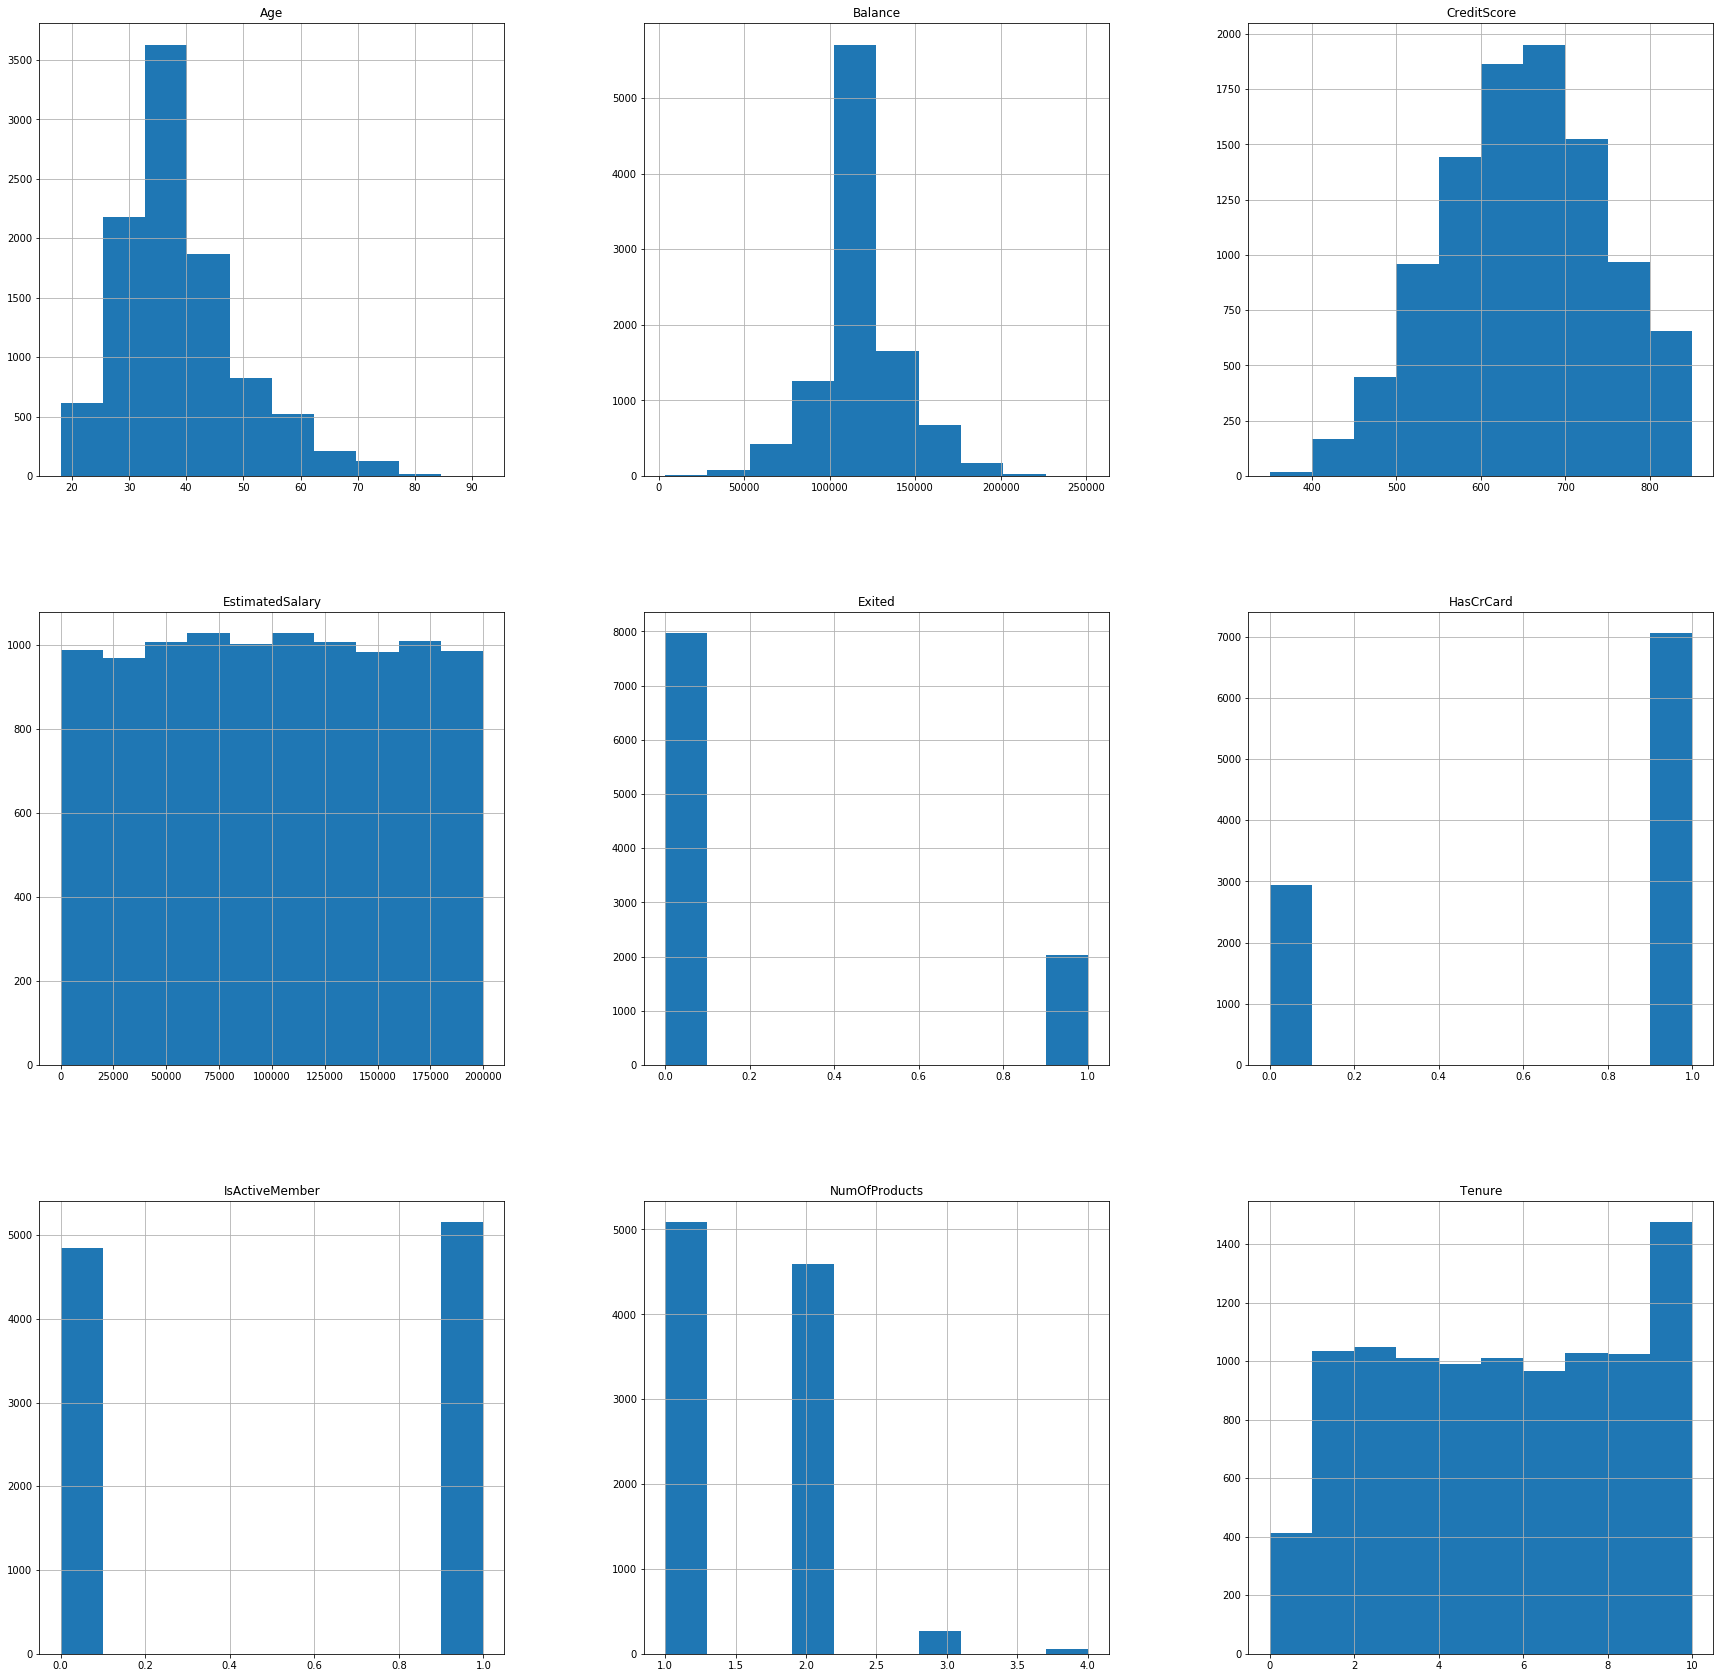

In [11]:
df.hist(sharex=False, sharey=False, figsize=(30, 30), xlabelsize=10, ylabelsize=10)
plt.show()

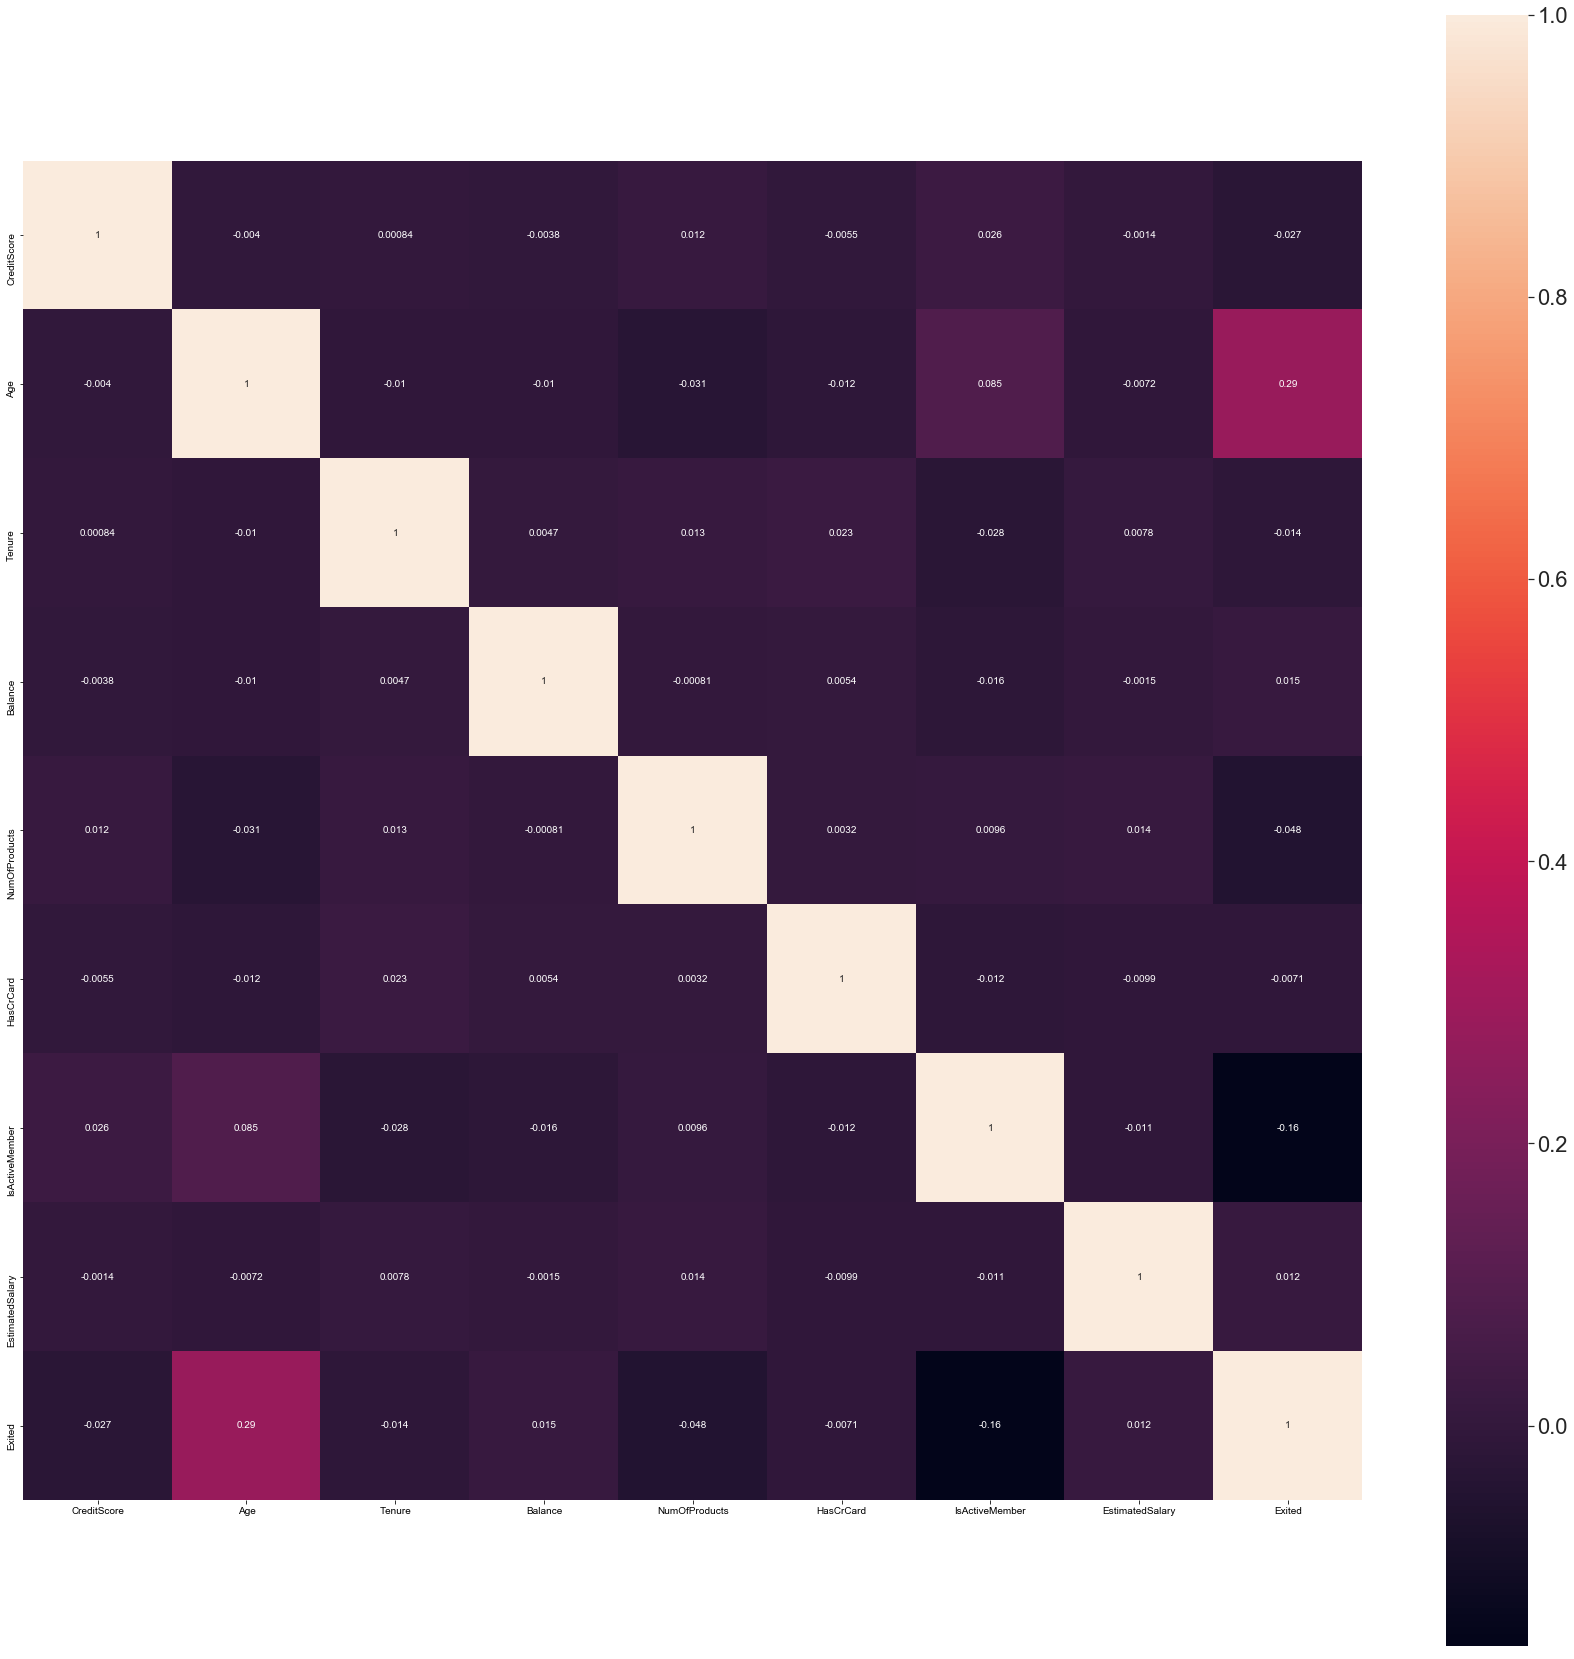

In [12]:
fig = plt.subplots(figsize = (30,30))
sns.set(font_scale=2.0)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

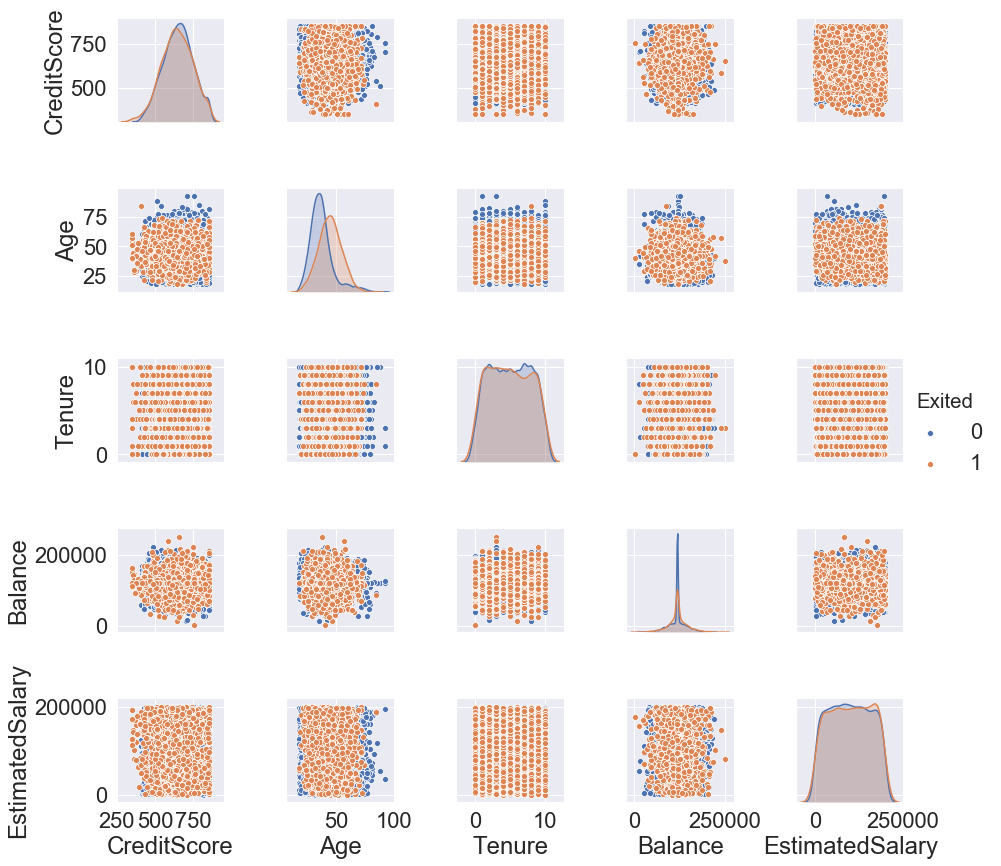

In [13]:
sns.pairplot(data = df , hue = 'Exited',vars = ['CreditScore','Age','Tenure','Balance','EstimatedSalary'])

### One hot Encoding
#### Encoding the features 'Geography' and 'Gender' as they are Categorical. 

In [14]:
from  sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
feature_arr = enc.fit_transform(df[['Geography','Gender']]).toarray()
feature_labels = enc.categories_

feature_labels = np.array(feature_labels).ravel()
feature_labels =  np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns=feature_labels)
print(features)

      France  Germany  Spain  Female  Male
0        1.0      0.0    0.0     1.0   0.0
1        0.0      0.0    1.0     1.0   0.0
2        1.0      0.0    0.0     1.0   0.0
3        1.0      0.0    0.0     1.0   0.0
4        0.0      0.0    1.0     1.0   0.0
5        0.0      0.0    1.0     0.0   1.0
6        1.0      0.0    0.0     0.0   1.0
7        0.0      1.0    0.0     1.0   0.0
8        1.0      0.0    0.0     0.0   1.0
9        1.0      0.0    0.0     0.0   1.0
10       1.0      0.0    0.0     0.0   1.0
11       0.0      0.0    1.0     0.0   1.0
12       1.0      0.0    0.0     1.0   0.0
13       1.0      0.0    0.0     1.0   0.0
14       0.0      0.0    1.0     1.0   0.0
15       0.0      1.0    0.0     0.0   1.0
16       0.0      1.0    0.0     0.0   1.0
17       0.0      0.0    1.0     1.0   0.0
18       0.0      0.0    1.0     0.0   1.0
19       1.0      0.0    0.0     1.0   0.0
20       1.0      0.0    0.0     0.0   1.0
21       0.0      0.0    1.0     1.0   0.0
22       0.

In [15]:
df = pd.concat([features,df], axis=1, sort=False)
df.head()

,France,Germany,Spain,Female,Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,619,France,Female,42,2,119827.493793,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,699,France,Female,39,1,119827.493793,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [16]:
df = df.drop(columns=['Geography', 'Gender'])
df.head()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,619,42,2,119827.493793,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.860000,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.800000,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,699,39,1,119827.493793,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.820000,1,1,1,79084.10,0


In [17]:
df1 = df
X = df.drop(['Exited'],axis = 1)
y = df['Exited']

### Feature Scaling 

In [18]:
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(df, x2=None, value=156)
for i in range(len(X.columns)) :
    if pval[i]<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")

reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis


#### Null hypothesis is rejected, which means there is relationship between the variables and Variables are not normally distributed.
#### Therefore, using the MinMax scaler to place the numbers in each numerical field on a scale from 0 to 1 so that our models could produce more accurate results.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Splitting into train and test datasets
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train_org)
X_test = scale.transform(X_test_org)

In [20]:
X.tail()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,1.0,0.0,0.0,0.0,1.0,771,39,5,119827.493793,2,1,0,96270.64
9996,1.0,0.0,0.0,0.0,1.0,516,35,10,57369.610000,1,1,1,101699.77
9997,1.0,0.0,0.0,1.0,0.0,709,36,7,119827.493793,1,0,1,42085.58
9998,0.0,1.0,0.0,0.0,1.0,772,42,3,75075.310000,2,1,0,92888.52
9999,1.0,0.0,0.0,1.0,0.0,792,28,4,130142.790000,1,1,0,38190.78


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Applying Voting Classifiers

In [28]:
#Grid Search for Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.001  , 0.00107, ..., 0.93325, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
print("Best parameters: {}".format(grid_lr.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_lr.best_score_))

Best parameters: {'C': 0.9332543007969906, 'penalty': 'l1'}
Best cross-validation score: 0.765100


In [37]:
# Grid Search for Decission Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
#grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid_svm, cv=10, return_train_score=True)
#param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
param_grid = {'max_depth': np.arange(1, 10)}
grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [36]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.855375


### Hard Voting Classifier

In [29]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(solver = 'lbfgs')
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt_clf', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.815
DecisionTreeClassifier 0.796
VotingClassifier 0.826


### Soft Voting Classifier 

In [38]:
log_clf = LogisticRegression(solver = 'lbfgs')
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt_clf', dt_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred).round(3))



LogisticRegression 0.815
DecisionTreeClassifier 0.798
VotingClassifier 0.8


## Bagging

### Bagging with Decision Tree 

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.8558


In [40]:
#Building model with the best paramaeters obtained from above step
from sklearn.ensemble import BaggingClassifier
dt_clf = DecisionTreeClassifier(max_depth = 6, random_state=0)
bg_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=400, bootstrap=True, n_jobs=-1, random_state=0)
bg_clf.fit(X_train, y_train)
y_pred = bg_clf.predict(X_test)
print('Train Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(bg_clf.score(X_train, y_train)))
print('Test Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(bg_clf.score(X_test, y_test)))

Train Set score after Bagging on Decision Tree Classifier: 0.8651
Test Set score after Bagging on Decision Tree Classifier: 0.8620


In [41]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix for test: \n", confusion)

Confusion matrix for test: 
 [[1547   70]
 [ 227  156]]


In [42]:
confusion = confusion_matrix(y_train, grid_search.predict(X_train))
print("Confusion matrix for train: \n", confusion)

Confusion matrix for train: 
 [[6125  221]
 [ 843  811]]


In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: " ,accuracy)

Accuracy of the Classifier:  0.8515


### Bagging with Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [50,100,200,500],'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'n_estimators': 500}
Best cross-validation score: 0.8636


In [46]:
#Building model with the best parameters obtained from above step:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth = 9, bootstrap=True, n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('Train Set score after Bagging on Random Forest Classifier: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test Set score after Bagging on Random Forest Classifier: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Train Set score after Bagging on Random Forest Classifier: 0.8874
Test Set score after Bagging on Random Forest Classifier: 0.8605


In [47]:
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix for test: \n", confusion)

Confusion matrix for test: 
 [[1575   42]
 [ 237  146]]


In [49]:
confusion = confusion_matrix(y_train, grid_search.predict(X_train))
print("Confusion matrix for train: \n", confusion)

Confusion matrix for train: 
 [[6267   79]
 [ 822  832]]


In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: " ,accuracy)

Accuracy of the Classifier:  0.8605


## Pasting

### Pasting with Decision Tree  

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 6, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=400, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(bag_clf.score(X_test, y_test)))

Train Set score after Bagging on Decision Tree Classifier: 0.8632
Test Set score after Bagging on Decision Tree Classifier: 0.8610


In [57]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix for test: \n", confusion)

Confusion matrix for test: 
 [[1592   25]
 [ 253  130]]


In [58]:
confusion = confusion_matrix(y_train, grid_search.predict(X_train))
print("Confusion matrix for train: \n", confusion)

Confusion matrix for train: 
 [[6201  145]
 [1002  652]]


In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: " ,accuracy)

Accuracy of the Classifier:  0.861


### Pasting with Random Forest 

In [65]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth = 9, max_leaf_nodes=16, bootstrap=False, n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('Train Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test Set score after Bagging on Decision Tree Classifier: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Train Set score after Bagging on Decision Tree Classifier: 0.8510
Test Set score after Bagging on Decision Tree Classifier: 0.8510


In [66]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix for test: \n", confusion)

Confusion matrix for test: 
 [[1592   25]
 [ 253  130]]


In [146]:
#confusion = confusion_matrix(y_train, grid_search.predict(X_train))
#print("Confusion matrix for train: \n", confusion)

In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: " ,accuracy)

Accuracy of the Classifier:  0.861


## AdaBoost Boosting

### AdaBoost with Logistic regression

In [94]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(log_clf, random_state = 0), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)




Train: 0.803625
Test 0.8145003093769334
parameters {'learning_rate': 1, 'n_estimators': 100}


In [95]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: ", accuracy)

Accuracy of the Classifier:  0.8155


### AdaBoost with Decision Tree

In [86]:
dt_clf = DecisionTreeClassifier(max_depth = 1, random_state=0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print("Accuracy of the decision tree classifier ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the decision tree classifier  0.8085


In [82]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold =KFold(n_splits=5, random_state=0)
param_grid = {'n_estimators': [10, 50, 100],'learning_rate': [0.1, 0.5, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(dt_clf, random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
test=cross_val_score(grid_search,X_test, y_test,cv=5).mean()
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.85525
Test 0.8274966249789062
parameters {'learning_rate': 0.1, 'n_estimators': 10}


In [91]:
#Accuracy after applying AdaBoost
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: ",accuracy)

Accuracy of the Classifier:  0.849


## Gradient Boosting

In [ ]:
# grid search to find best parameters for gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

In [ ]:
gb = GradientBoostingClassifier(random_state=0, learning_rate= 0.1, max_depth = 5, n_estimators=100)
gb.fit(X_train1, y_train1) 
y_pred = gb.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix for test: \n",confusion)

In [ ]:
confusion = confusion_matrix(y_train, grid_search.predict(X_train))
print("Confusion matrix for train: \n",confusion)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Accuracy of the Classifier: ",accuracy)

## PCA for Classification

In [107]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca_classification = PCA(n_components = .95)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)
pca_classification.n_components_

8

In [116]:
X.shape

(10000, 13)

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
X_train_class = pca_classification.fit_transform(X_train1)
X_test_class = pca_classification.transform(X_test1)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test

### PCA on KNN Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [121]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn_clf.predict(X_test_reduced))
print("Confusion matrix:",confusion)

Confusion matrix: [[1560   57]
 [ 341   42]]


In [124]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.79


In [128]:
print('Train score: ', knn_clf.score(X_train_reduced, y_train))
print('Test score: ', knn_clf.score(X_test_reduced, y_test))

accuracy = accuracy_score(y_test, knn_clf.predict(X_test_reduced))
print("Accuracy of the Classifier:",accuracy)

Train score:  0.816625
Test score:  0.801
Accuracy of the Classifier: 0.801


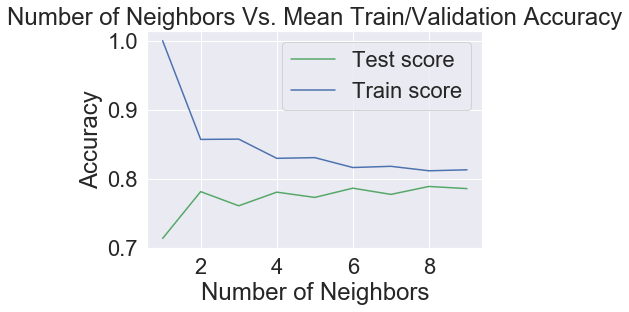

In [126]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],c='g',label='Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],c='b',label='Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [198]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
precision = precision_score(y_test, knn_clf.predict(X_test_reduced))
recall = recall_score(y_test, knn_clf.predict(X_test_reduced))
f1 = f1_score(y_test, knn_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, knn_clf.predict(X_test_reduced))


In [215]:
PCA_results = pd.DataFrame(columns=('S.No','Model_Name','Train_score','Test_Score', 'Accuracy','precision','recall','f1','AUC'))
PCA_results.loc[len(PCA_results)]=[1,'PCA - KNN',knn_clf.score(X_train_reduced, y_train),knn_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results


,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.801,0.809,1.0,0.002611,0.005208,0.501305


### PCA on Logistic Regression 

In [138]:
log_clf.fit(X_train_reduced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
print('Train score: ', log_clf.score(X_train_reduced, y_train))
print('Test score: ', log_clf.score(X_test_reduced, y_test))

Train score:  0.796
Test score:  0.8085


In [148]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, log_clf.predict(X_test_reduced))
print("Confusion matrix for test:",confusion)

Confusion matrix for test: [[1596   21]
 [ 362   21]]


In [149]:
confusion = confusion_matrix(y_train, log_clf.predict(X_train_reduced))
print("Confusion matrix for train:",confusion)

Confusion matrix for train: [[6266   80]
 [1552  102]]


In [216]:
accuracy = accuracy_score(y_test, log_clf.predict(X_test_reduced))
precision = precision_score(y_test, log_clf.predict(X_test_reduced))
recall = recall_score(y_test, log_clf.predict(X_test_reduced))
f1 = f1_score(y_test, log_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, log_clf.predict(X_test_reduced))

In [217]:
PCA_results.loc[len(PCA_results)]=[2, 'PCA-Logistic', log_clf.score(X_train_reduced, y_train),log_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]


In [218]:
PCA_results


,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.0,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.5,0.054830,0.098824,0.520922


### PCA on Linear SVM

In [160]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C = 1)
svm_clf.fit(X_train_reduced, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [161]:
print('Train score: ', svm_clf.score(X_train_reduced, y_train))
print('Test score: ', svm_clf.score(X_test_reduced, y_test))

Train score:  0.7935
Test score:  0.8085


In [164]:
confusion = confusion_matrix(y_test, svm_clf.predict(X_test_reduced))
print("Confusion matrix for test:\n" , confusion)
confusion = confusion_matrix(y_train, svm_clf.predict(X_train_reduced))
print("Confusion matrix for train:\n" , confusion)

Confusion matrix for test:
 [[1617    0]
 [ 383    0]]
Confusion matrix for train:
 [[6346    0]
 [1652    2]]


In [219]:
accuracy = accuracy_score(y_test, svm_clf.predict(X_test_reduced))
precision = precision_score(y_test, svm_clf.predict(X_test_reduced))
recall = recall_score(y_test, svm_clf.predict(X_test_reduced))
f1 = f1_score(y_test, svm_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, svm_clf.predict(X_test_reduced))


In [220]:
PCA_results.loc[len(PCA_results)]=[3,'Linear SVC',svm_clf.score(X_train_reduced, y_train),svm_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.0,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.5,0.054830,0.098824,0.520922
2,3,Linear SVC,0.793500,0.8085,0.8085,0.0,0.000000,0.000000,0.500000


### PCA on SVC Kernel-Linear

In [182]:
sk_clf = SVC(kernel='linear',C = 100)
sk_clf.fit(X_train_reduced, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [184]:
print('Train score: ', sk_clf.score(X_train_reduced, y_train))
print('Test score: ', sk_clf.score(X_test_reduced, y_test))

Train score:  0.79325
Test score:  0.8085


In [185]:
confusion = confusion_matrix(y_test, sk_clf.predict(X_test_reduced))
print("Confusion matrix for test:\n" , confusion)
confusion = confusion_matrix(y_train, sk_clf.predict(X_train_reduced))
print("Confusion matrix for train:\n" , confusion)

Confusion matrix for test:
 [[1617    0]
 [ 383    0]]
Confusion matrix for train:
 [[6346    0]
 [1654    0]]


In [221]:
accuracy = accuracy_score(y_test, sk_clf.predict(X_test_reduced))
precision = precision_score(y_test, sk_clf.predict(X_test_reduced))
recall = recall_score(y_test, sk_clf.predict(X_test_reduced))
f1 = f1_score(y_test, sk_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, sk_clf.predict(X_test_reduced))


In [222]:
PCA_results.loc[len(PCA_results)]=[4,'SVC Kernel-Linear',sk_clf.score(X_train_reduced, y_train),sk_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.0,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.5,0.054830,0.098824,0.520922
2,3,Linear SVC,0.793500,0.8085,0.8085,0.0,0.000000,0.000000,0.500000
3,4,SVC Kernel-Linear,0.793250,0.8085,0.8085,0.0,0.000000,0.000000,0.500000


### PCA on SVC Kernel-RBF

In [191]:
svmrbf_clf = SVC(kernel='rbf',C = 100)
svmrbf_clf.fit(X_train_reduced, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [192]:
print('Train score: ', svmrbf_clf.score(X_train_reduced, y_train))
print('Test score: ', svmrbf_clf.score(X_test_reduced, y_test))

Train score:  0.800375
Test score:  0.813


In [193]:
confusion = confusion_matrix(y_test, svmrbf_clf.predict(X_test_reduced))
print("Confusion matrix for test:\n" , confusion)
confusion = confusion_matrix(y_train, svmrbf_clf.predict(X_train_reduced))
print("Confusion matrix for train:\n" , confusion)

Confusion matrix for test:
 [[1611    6]
 [ 368   15]]
Confusion matrix for train:
 [[6313   33]
 [1564   90]]


In [223]:
accuracy = accuracy_score(y_test, svmrbf_clf.predict(X_test_reduced))
precision = precision_score(y_test, svmrbf_clf.predict(X_test_reduced))
recall = recall_score(y_test, svmrbf_clf.predict(X_test_reduced))
f1 = f1_score(y_test, svmrbf_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, svmrbf_clf.predict(X_test_reduced))

In [224]:
PCA_results.loc[len(PCA_results)]=[5,'SVC Kernel-RBF',svmrbf_clf.score(X_train_reduced, y_train),svmrbf_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.000000,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.500000,0.054830,0.098824,0.520922
2,3,Linear SVC,0.793500,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
3,4,SVC Kernel-Linear,0.793250,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
4,5,SVC Kernel-RBF,0.800375,0.8130,0.8130,0.714286,0.039164,0.074257,0.517727


### PCA on SVC Kernel-Poly

In [211]:
svmpoly_clf = SVC(kernel='poly',C = 100)
svmpoly_clf.fit(X_train_reduced, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [212]:
print('Train score: ', svmpoly_clf.score(X_train_reduced, y_train))
print('Test score: ', svmpoly_clf.score(X_test_reduced, y_test))

Train score:  0.79475
Test score:  0.809


In [213]:
confusion = confusion_matrix(y_test, svmpoly_clf.predict(X_test_reduced))
print("Confusion matrix for test:\n" , confusion)
confusion = confusion_matrix(y_train, svmpoly_clf.predict(X_train_reduced))
print("Confusion matrix for train:\n" , confusion)

Confusion matrix for test:
 [[1617    0]
 [ 382    1]]
Confusion matrix for train:
 [[6346    0]
 [1642   12]]


In [225]:
accuracy = accuracy_score(y_test, svmpoly_clf.predict(X_test_reduced))
precision = precision_score(y_test, svmpoly_clf.predict(X_test_reduced))
recall = recall_score(y_test, svmpoly_clf.predict(X_test_reduced))
f1 = f1_score(y_test, svmpoly_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, svmpoly_clf.predict(X_test_reduced))

In [226]:
PCA_results.loc[len(PCA_results)]=[6,'SVC Kernel-Poly',svmpoly_clf.score(X_train_reduced, y_train),svmpoly_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.000000,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.500000,0.054830,0.098824,0.520922
2,3,Linear SVC,0.793500,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
3,4,SVC Kernel-Linear,0.793250,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
4,5,SVC Kernel-RBF,0.800375,0.8130,0.8130,0.714286,0.039164,0.074257,0.517727
5,6,SVC Kernel-Poly,0.794750,0.8090,0.8090,1.000000,0.002611,0.005208,0.501305


### PCA on Decision Tree

In [227]:
dt_clf.fit(X_train_reduced, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [231]:
param_grid = {'max_depth': np.arange(1, 10)}
grid_search.fit(X_train_reduced, y_train)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print('Train score: ', dt_clf.score(X_train_reduced, y_train))
print('Test score: ',dt_clf.score(X_test_reduced, y_test))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.81
Train score:  0.8075
Test score:  0.821


In [232]:
confusion = confusion_matrix(y_test, dt_clf.predict(X_test_reduced))
print("Confusion matrix for test:\n" , confusion)
confusion = confusion_matrix(y_train, dt_clf.predict(X_train_reduced))
print("Confusion matrix for train:\n" , confusion)

Confusion matrix for test:
 [[1609    8]
 [ 350   33]]
Confusion matrix for train:
 [[6322   24]
 [1516  138]]


In [233]:
accuracy = accuracy_score(y_test, dt_clf.predict(X_test_reduced))
precision = precision_score(y_test, dt_clf.predict(X_test_reduced))
recall = recall_score(y_test, dt_clf.predict(X_test_reduced))
f1 = f1_score(y_test, dt_clf.predict(X_test_reduced))
auc = roc_auc_score(y_test, dt_clf.predict(X_test_reduced))

In [234]:
PCA_results.loc[len(PCA_results)]=[7,'Decision Tree', dt_clf.score(X_train_reduced, y_train),svmpoly_clf.score(X_test_reduced, y_test), accuracy, precision, recall, f1, auc]
PCA_results

,S.No,Model_Name,Train_score,Test_Score,Accuracy,precision,recall,f1,AUC
0,1,PCA - KNN,0.816625,0.8010,0.8090,1.000000,0.002611,0.005208,0.501305
1,2,PCA-Logistic,0.796000,0.8085,0.8085,0.500000,0.054830,0.098824,0.520922
2,3,Linear SVC,0.793500,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
3,4,SVC Kernel-Linear,0.793250,0.8085,0.8085,0.000000,0.000000,0.000000,0.500000
4,5,SVC Kernel-RBF,0.800375,0.8130,0.8130,0.714286,0.039164,0.074257,0.517727
5,6,SVC Kernel-Poly,0.794750,0.8090,0.8090,1.000000,0.002611,0.005208,0.501305
6,7,Decision Tree,0.807500,0.8090,0.8210,0.804878,0.086162,0.155660,0.540607


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [3]:
import pandas as pd
Model_Summary = {'Model':['KNN','Logistic Regression','Linear SVC','SVC Kernel-Linear','SVC Kernel-RBF','SVC Kernel-Poly','Decision Tree'],
    'Training Scores':['0.89', '0.80', '0.66', '0.78','0.81','0.78','0.66'],
    'Training Scores after PCA':['0.81', '0.79', '0.79','0.79','0.80', '0.79','0.80'],                  
    'Testing Scores':['0.80', '0.81', '0.63', '0.80', '0.81','0.80','0.64'],
    'Testing Scores after PCA':['0.80', '0.80', '0.80','0.80', '0.81','0.80','0.80']
            }
Model_Summary = pd.DataFrame(Model_Summary)
Model_Summary

,Model,Training Scores,Training Scores after PCA,Testing Scores,Testing Scores after PCA
0,KNN,0.89,0.81,0.80,0.80
1,Logistic Regression,0.80,0.79,0.81,0.80
2,Linear SVC,0.66,0.79,0.63,0.80
3,SVC Kernel-Linear,0.78,0.79,0.80,0.80
4,SVC Kernel-RBF,0.81,0.80,0.81,0.81
5,SVC Kernel-Poly,0.78,0.79,0.80,0.80
6,Decision Tree,0.66,0.80,0.64,0.80


#### According to the obtained results, we can see that in few models the train/test accuracy is better without PCA. However, the accuracy are nearly comparable for models with or without PCA.  

## Deep Learning Models

In [48]:
X = df1.drop(['Exited'],axis = 1)
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

(10000, 13)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [51]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
7500/7500 [==============================] - 0s 46us/sample - loss: 3.2988 - acc: 0.7953
Epoch 2/20
7500/7500 [==============================] - 0s 33us/sample - loss: 3.2988 - acc: 0.7953
Epoch 3/20
7500/7500 [==============================] - 0s 25us/sample - loss: 3.2988 - acc: 0.7953
Epoch 4/20
7500/7500 [==============================] - 0s 27us/sample - loss: 3.2988 - acc: 0.7953
Epoch 5/20
7500/7500 [==============================] - 0s 27us/sample - loss: 3.2988 - acc: 0.7953
Epoch 6/20
7500/7500 [==============================] - 0s 27us/sample - loss: 3.2988 - acc: 0.7953
Epoch 7/20
7500/7500 [==============================] - 0s 26us/sample - loss: 3.2988 - acc: 0.7953
Epoch 8/20
7500/7500 [==============================] - 0s 26us/sample - loss: 3.2988 - acc: 0.7953
Epoch 9/20
7500/7500 [==============================] - 0s 27us/sample - loss: 3.2988 - acc: 0.7953
Epoch 10/20
7500/7500 [==============================] - 0s 26us/sample - loss: 3.2988 - acc: 0.7953

In [52]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2500/2500 [==============================] - 0s 67us/sample - loss: 3.2365 - acc: 0.7992

acc: 79.92%
